In [2]:
!pip install drain3

  Created wheel for drain3: filename=drain3-0.9.3-py3-none-any.whl size=16394 sha256=98c906382dc8aae6e0a9bae5f85b5bf5e8b6d643dc3dc45d348d3244f72446f3
  Stored in directory: /home/jovyan/.cache/pip/wheels/43/17/4e/35daa9f4c82e0d1cf2da736efb423ffcfc18ee370209dfdd6c
Successfully built drain3


In [3]:
from scipy import stats 
from drain3.drain import Drain
from matplotlib import pyplot as plt

import joblib
import numpy as np
import seaborn as sns
import pandas as pd

### Import Cluster Hit Arrays

In [16]:
cluster_hits = joblib.load('/home/jovyan/results/matrices_dict.joblib')

In [17]:
containers = joblib.load('/home/jovyan/results/containers.joblib')

In [18]:
labels = joblib.load('/home/jovyan/results/labels.joblib')

In [19]:
collections = joblib.load('/home/jovyan/results/collections.joblib')

In [20]:
dd = joblib.load('/home/jovyan/results/drain_dict.joblib')

### Record Means

In [77]:
# The cluster_hits array has the following key structure: [collection][label][container]
means_dict = {}

for idx, col_val in cluster_hits.items():
    means_dict[idx] = {}
    for label, l_val in col_val.items():
        means_dict[idx][label] = {}
        for container, c_val in l_val.items():
            Mu = stats.trim_mean(c_val, axis=1, proportiontocut=0.05)
            means_dict[idx][label][container] = Mu

### Build Poisson Distributions [Depreciated]

In [ ]:
# The cluster_hits array has the following key structure: [collection][label][container]
p_dict = {}

for idx, col_val in cluster_hits.items():
    p_dict[idx] = {}
    for label, l_val in col_val.items():
        p_dict[idx][label] = {}
        for container, c_val in l_val.items():
            p_dict[idx][label][container] = {}
            Mu = np.mean(c_val, axis=1, proportiontocut=0.05)
            drain_model = dd[container]
            for cluster in drain_model.clusters:
                p_model = poisson(Mu[cluster.cluster_id-1])
                p_dict[idx][label][container][cluster.get_template()] = p_model

In [78]:
labels

{'core.soaesb-dead-soa-process',
 'healthy',
 'newscene-bundle-stopped',
 'nitf-messaging-bundle-stopped'}

In [85]:
A = [1, 2]

In [86]:
A

[1, 2]

### Construct Means DataFrame

In [103]:
'''
We will encode each label as such:
    1 := 'core.soaesb-dead-soa-process'
    2 := 'healthy'
    3 := 'newscene-bundle-stopped'
    4 := 'nitf-messaging-bundle-stopped'
'''

means = []
means_labels = []
clusters = []
indices = []

for idx, col_val in cluster_hits.items():
    for label, l_val in col_val.items():
        for container, c_val in l_val.items():
            drain_model = dd[container]
            means += list(means_dict[idx][label][container])
            means_labels += [label]*len(means_dict[idx][label][container])
            indices += [idx]*len(means_dict[idx][label][container])
            for cluster in drain_model.clusters:
                clusters.append(cluster.get_template())

data = {'mean': means, 
        'index': indices,
        'label': means_labels,
        'cluster': clusters}

df = pd.DataFrame(data)

In [135]:
'''
We will encode each label as such:
    1 := 'core.soaesb-dead-soa-process'
    2 := 'healthy'
    3 := 'newscene-bundle-stopped'
    4 := 'nitf-messaging-bundle-stopped'
'''

z_means = []
z_means_labels = []
z_clusters = []
z_indices = []
z_containers = []

for idx, col_val in cluster_hits.items():
    for label, l_val in col_val.items():
        for container, c_val in l_val.items():
            drain_model = dd[container]
            for cluster in drain_model.clusters:
                if means_dict[idx][label][container][cluster.cluster_id-1] > 0:
                    z_clusters.append(cluster.get_template())
                    z_means.append(means_dict[idx][label][container][cluster.cluster_id-1])
                    z_indices.append(idx)
                    z_means_labels.append(label)
                    z_containers.append(container)

z_data = {'mean': z_means, 
          'index': z_indices,
          'label': z_means_labels,
          'cluster': z_clusters,
          'container': z_containers}

zdf = pd.DataFrame(z_data)

In [15]:
d_total_hits = []
d_labels = []
d_clusters = []
d_indices = []
d_containers = []

for idx, col_val in cluster_hits.items():
    for label, l_val in col_val.items():
        for container, c_val in l_val.items():
            drain_model = dd[container]
            for cluster in drain_model.clusters:
                hits = list(cluster_hits[idx][label][container][cluster.cluster_id-1])
                n = len(hits)
                d_clusters+=[cluster.get_template()]*n
                d_total_hits+=hits
                d_indices+=[idx]*n
                d_labels+=[label]*n
                d_containers+=[container]*n

data = {'hits': d_total_hits, 
        'index': d_indices,
        'label': d_labels,
        'cluster': d_clusters,
        'container': d_containers}

df = pd.DataFrame(data)

In [10]:
for _, item in data.items():
    print(len(item))

7448034
7448034
7448034
7448034
7448034


In [22]:
containers

{'1.solr.soaesb',
 '1.zookeeper.soaesb',
 'brokerStack_broker-master-1.1.bozouia5km2umeysji93tocfq',
 'brokerStack_broker-master-1.1.ep8iqm0i5tgumu6bf0nsj3llr',
 'brokerStack_broker-master-1.1.p09hgju7bv1ygi8tdha11id8a',
 'core.soaesb',
 'filebeat',
 'grafana.metrics.soaesb',
 'haproxyStack_soaesb.1.9sz9m04m5j7zdir3tsdv9peco',
 'haproxyStack_soaesb.1.hen5dtnv1r2xvo8aekpgl38qx',
 'haproxyStack_soaesb.1.u50xthv1u16xnps5eoe4wgh26',
 'healthcheck',
 'mmsStack_mms-app.1.1gdmwxttue7gajxqw50e3lqdc',
 'mmsStack_mms-app.1.j9jzami3rko4pcnh9lq7k1511',
 'mmsStack_mms-app.1.p4jfi3y3966d2p2902j9i8r32',
 'periodicCatalogUpdaterStack_periodic-catalog-updater-app.1.09oln2375lgzw8nqwi0h6km8o',
 'prometheus.metrics.soaesb',
 'soaesb-diagnostic-ai-log-collection'}

In [ ]:
sdf = df[df['container']=='core.soaesb']
dims = (25, 12)
#fig, ax = plt.subplots(figsize=dims)
g = sns.displot(sdf, x="hits", row="cluster", col="label")
#ax.tick_params(labelbottom=False) 

### Display the poisson distributions

#### Generate plot data

In [64]:
collection = 1
container = 'grafana.metrics.soaesb'
drain_model = dd[container]
X = {}
Y = {}
for label in labels:
    X[label] = {}
    Y[label] = {}
    for cluster in drain_model.clusters:
        pois = p_dict[collection][label][container][cluster.get_template()]
        x = np.arange(poisson.ppf(0.01, pois.mean()),
                      poisson.ppf(0.99, pois.mean()))
        X[label][cluster.get_template()] = x
        Y[label][cluster.get_template()] = poisson.pmf(x, pois.mean())

#### Display plots

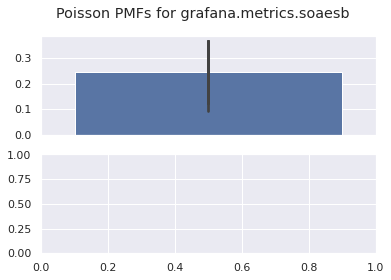

In [73]:
fig, axes = plt.subplots(len(drain_model.clusters), 1)
sns.set()
fig.suptitle(f'Poisson PMFs for {container}')

for cluster in drain_model.clusters:
    count = 0
    data = []
    for label in labels:
        sns.barplot(y=Y[label][cluster.get_template()], ax=axes[count])
    count+=1

In [66]:
[y for y in Y[label]['<*> lvl=info msg="Alert Rule returned no data" logger=alerting.evalContext ruleId=3 name="Panel Title alert" changing state to=keep_state'] for label in labels]

[]